In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import h5py
from mpl_toolkits.axes_grid1 import make_axes_locatable

mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
font = {'family' : 'serif',
        'size'   : 20}
mpl.rc('font', **font)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from nbodykit.lab import *

Nmodel="Linear"

In [2]:
filename='data_HMass-DenDM.h5'
f = h5py.File(filename, 'r')
headers=list(f.keys())
print(headers)
print(f['DM_density'].shape)
print(f['Halos_masses'].shape)
DMD=f['DM_density']
DMD=np.array(DMD)
HM=f['Halos_masses']
HM=np.array(HM)
f.close()

['DM_density', 'Halos_masses']
(2097152,)
(2097152,)


In [3]:
fig = plt.figure(figsize=(7, 7))
plt.jet()
plt.title("DMD Full")
ax=plt.gca()
DMD_full=DMD.reshape(128,128,128)
mesh = ArrayMesh(DMD_full, BoxSize=1.0)
plt.imshow(mesh.preview(axes=[0,1]),norm=mpl.colors.LogNorm())
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar=plt.colorbar(cax=cax)
cbar.ax.set_ylabel('log DM Density_full [a.u.]', size=20)
plt.show()

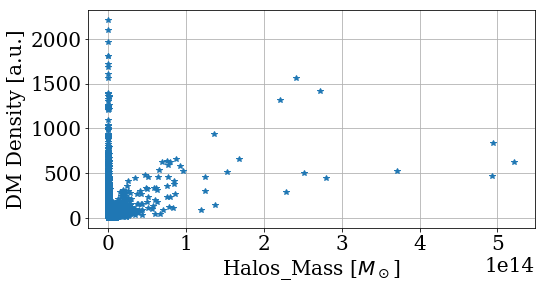

In [4]:
fig = plt.figure(figsize=(8, 4))
plt.plot(HM,DMD,"*")
plt.xlabel('Halos_Mass [$M_\odot$]',size=20)
plt.ylabel('DM Density [a.u.]',size=20)
plt.grid()
# plt.savefig('./Figures_data_HMass-DenDM/DMD_HM')
plt.show()

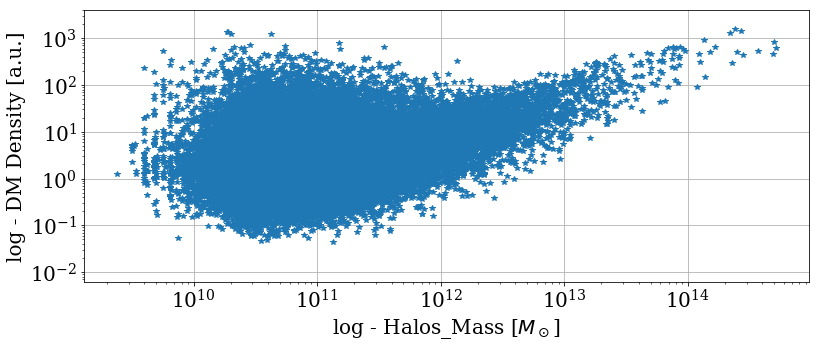

In [5]:
fig = plt.figure(figsize=(13, 5))
plt.plot(HM,DMD,"*")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("log - Halos_Mass [$M_\odot$]",size=20)
plt.ylabel("log - DM Density [a.u.]",size=20)
plt.grid()
# plt.savefig('./Figures_data_HMass-DenDM/logDMD_logHM')
plt.show()

In [6]:
filename='data_HMass-DenDM_V.h5'
f = h5py.File(filename, 'r')
headers=list(f.keys())
print(headers)
print(f['DM_density'].shape)
print(f['Halos_masses'].shape)
DMD=f['DM_density']
DMD=np.array(DMD)
HM=f['Halos_masses']
HM=np.array(HM)
f.close()

['DM_density', 'Halos_masses']
(128, 128, 128)
(128, 128, 128)


In [7]:
fig = plt.figure(figsize=(7, 7))
plt.jet()
plt.title("DMD Full")
ax=plt.gca()
mesh = ArrayMesh(DMD_full, BoxSize=1.0)
plt.imshow(mesh.preview(axes=[0,1]),norm=mpl.colors.LogNorm())
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar=plt.colorbar(cax=cax)
cbar.ax.set_ylabel('log DM Density_full [a.u.]', size=20)
plt.show()

In [8]:
train=0.5
long=len(HM[0])
lim=int(long*train)

HM_train=[]
HM_test=[]
DMD_train=[]
DMD_test=[]
HM_slice=[]
DMD_slice=[]
h=0

for i in range(0,long):
    for j in range(0,long):
        for k in range(0,long):
            if k<lim:
                HM_train.append(HM[i][j][k])
                DMD_train.append(DMD[i][j][k])
            else:    
                HM_test.append(HM[i][j][k])
                DMD_test.append(DMD[i][j][k]) 
                
            if(DMD[i][j][k]>1000):
                h=h+1
                
            if k>100 and k<102:
                HM_slice.append(HM[i][j][k])
                DMD_slice.append(DMD[i][j][k])
                             
                
HM_train=np.array(HM_train)
DMD_train=np.array(DMD_train)
HM_test=np.array(HM_test)
DMD_test=np.array(DMD_test)
HM_slice=np.array(HM_slice)
DMD_slice=np.array(DMD_slice)


print("h="+str(h))
print(HM_train.shape)
print(DMD_train.shape)
print(HM_test.shape)
print(DMD_test.shape)

h=33
(1048576,)
(1048576,)
(1048576,)
(1048576,)


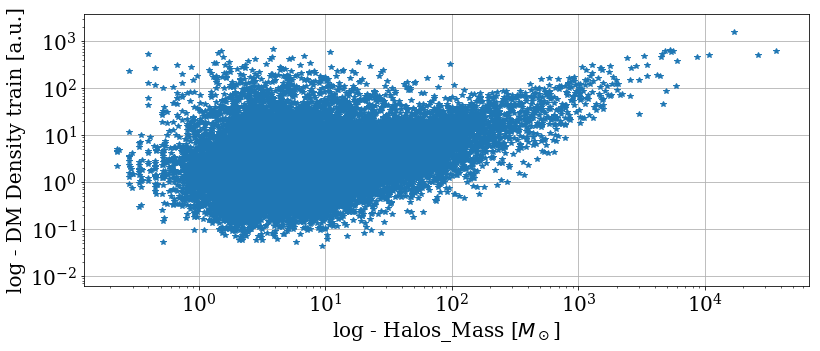

In [9]:
fig = plt.figure(figsize=(13, 5))
plt.plot(HM_train.ravel(),DMD_train.ravel(),"*")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("log - Halos_Mass [$M_\odot$]",size=20)
plt.ylabel("log - DM Density train [a.u.]",size=20)
plt.grid()
plt.savefig('./Figures_data_HMass-DenDM/'+Nmodel+'_logDMD_logHM_train', bbox_inches = 'tight')
plt.show()

In [10]:
clf = LinearRegression()
clf.fit(HM_train[:,np.newaxis], DMD_train[:,np.newaxis])
DMD_pred=clf.predict(HM_test[:,np.newaxis])

print(sum(DMD_pred))
print(sum(DMD_test))

[ 986644.98892202]
1116331.44818


In [11]:
fig = plt.figure(figsize=(13, 5))
plt.plot(HM_test.ravel(),DMD_test.ravel(),"*")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("log - Halos_Mass [$M_\odot$]",size=20)
plt.ylabel("log - DM Density test [a.u.]",size=20)
plt.grid()
plt.savefig('./Figures_data_HMass-DenDM/'+Nmodel+'_logDMD_logHM_test', bbox_inches = 'tight')
plt.show()

In [12]:
fig = plt.figure(figsize=(13, 5))
plt.plot(HM_test.ravel(),DMD_pred.ravel(),"*")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("log - Halos_Mass [$M_\odot$]",size=20)
plt.ylabel("log - DM Density pred [a.u.]",size=20)
plt.grid()
plt.savefig('./Figures_data_HMass-DenDM/'+Nmodel+'_logDMD_logHM_pred', bbox_inches = 'tight')
plt.show()

In [13]:
fig = plt.figure(figsize=(15, 7))
plt.jet()
plt.subplot(121)
plt.title("DMD Train")
DMD_trainp=DMD_train.reshape(long,long,round(long*train))
mesh = ArrayMesh(DMD_trainp, BoxSize=1.0)
plt.imshow(mesh.preview(axes=[0,1]),norm=mpl.colors.LogNorm())
ax=plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar=plt.colorbar(cax=cax)
cbar.ax.set_ylabel('log DM Density_train [a.u.]', size=20)
plt.show()

In [14]:
fig = plt.figure(figsize=(16, 7))
plt.jet()
plt.subplot(121)
plt.title("DMD Predicted")
DMD_predp=DMD_pred.reshape(long,long,round(long*(1-train)))
mesh = ArrayMesh(DMD_predp, BoxSize=1.0)
plt.imshow(mesh.preview(axes=[0,1]),norm=mpl.colors.LogNorm())
plt.xlim(0,128)
plt.ylim(0,128)
ax=plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar=plt.colorbar(cax=cax)
cbar.ax.set_ylabel('log DM Density_pred [a.u.]', size=20)

plt.subplot(122)
plt.title("DMD Test")
DMD_testp=DMD_test.reshape(long,long,round(long*(1-train)))
mesh = ArrayMesh(DMD_testp, BoxSize=1.0)
plt.imshow(mesh.preview(axes=[0,1]),norm=mpl.colors.LogNorm())
plt.xlim(0,128)
plt.ylim(0,128)
ax=plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar=plt.colorbar(cax=cax)
cbar.ax.set_ylabel('log DM Density_test [a.u.]', size=20)

plt.tight_layout()
plt.savefig('./Figures_data_HMass-DenDM/'+Nmodel+'_DMD_hist', bbox_inches = 'tight')
plt.show()
print(DMD_testp[:,:,0].shape)

(128, 128)


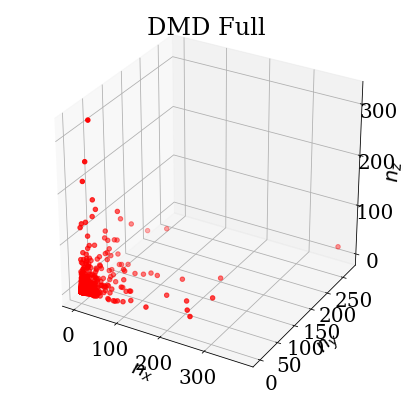

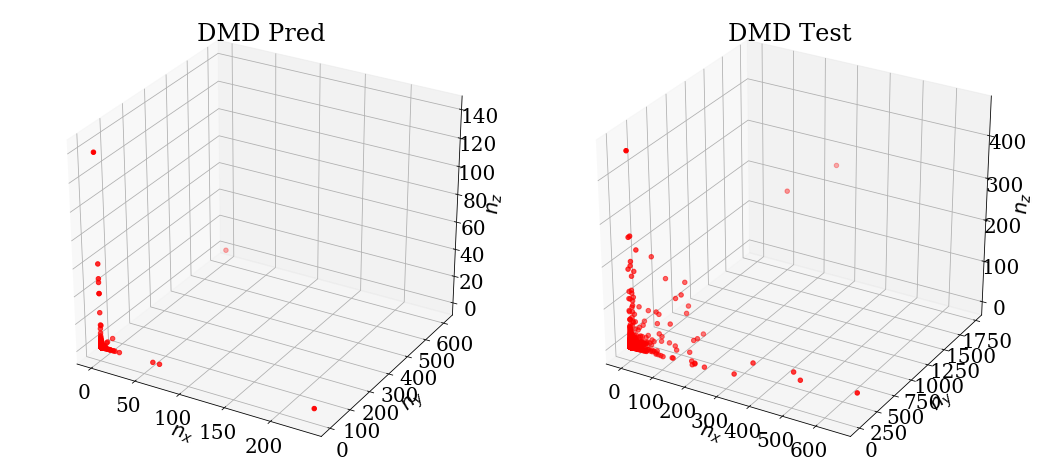

In [15]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7, 7))
ax = fig.gca(projection='3d')
plt.title("DMD Full")
ax.scatter(DMD[:,:,0], DMD[:,:,1], DMD[:,:,2], c='red')
ax.set_xlabel('$n_x$')
ax.set_ylabel('$n_y$')
ax.set_zlabel('$n_z$')
plt.show()

fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(122, projection='3d')
plt.title("DMD Test")
ax.scatter(DMD_testp[:,:,0], DMD_testp[:,:,1], DMD_testp[:,:,2], c='red')
ax.set_xlabel('$n_x$')
ax.set_ylabel('$n_y$')
ax.set_zlabel('$n_z$')
ax = fig.add_subplot(121, projection='3d')
plt.title("DMD Pred")
ax.scatter(DMD_predp[:,:,0], DMD_predp[:,:,1], DMD_predp[:,:,2], c='red')
ax.set_xlabel('$n_x$')
ax.set_ylabel('$n_y$')
ax.set_zlabel('$n_z$')
plt.tight_layout()
plt.savefig('./Figures_data_HMass-DenDM/'+Nmodel+'_DMD_scatter', bbox_inches = 'tight')
plt.show()

In [16]:
clf = LinearRegression()
clf.fit(HM_train[:,np.newaxis], DMD_train[:,np.newaxis])
DMD_slicepred=clf.predict(HM_slice[:,np.newaxis])

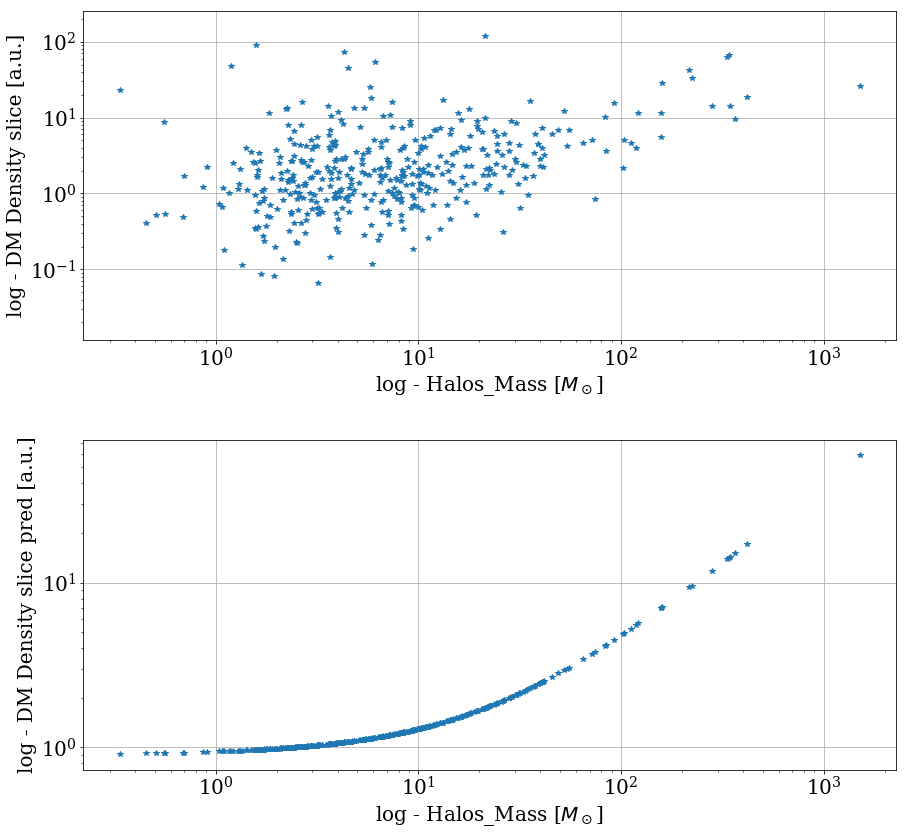

In [17]:
fig = plt.figure(figsize=(13, 12))
plt.subplot(211)
plt.plot(HM_slice.ravel(),DMD_slice.ravel(),"*")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("log - Halos_Mass [$M_\odot$]",size=20)
plt.ylabel("log - DM Density slice [a.u.]",size=20)
plt.grid()
plt.subplot(212)
plt.plot(HM_slice.ravel(),DMD_slicepred.ravel(),"*")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("log - Halos_Mass [$M_\odot$]",size=20)
plt.ylabel("log - DM Density slice pred [a.u.]",size=20)
plt.grid()
plt.savefig('./Figures_data_HMass-DenDM/'+Nmodel+'_logDMD_logHM_pred_slice', bbox_inches = 'tight')
plt.tight_layout()
plt.show()

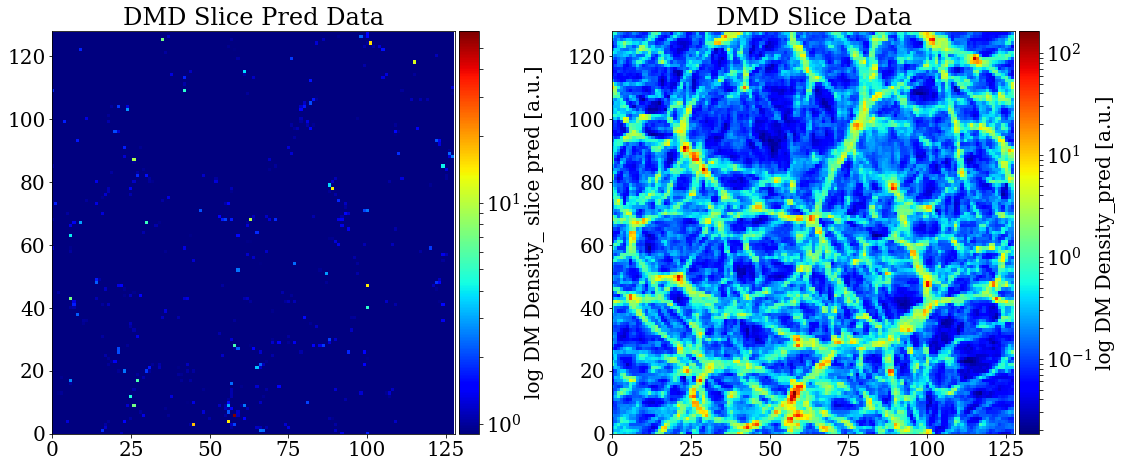

In [18]:
fig = plt.figure(figsize=(16, 7))
plt.subplot(122)
plt.title("DMD Slice Data")
DMD_slicep=DMD_slice.reshape(long,long,1)
plt.imshow(DMD_slicep[:,:,0],norm=mpl.colors.LogNorm())
plt.xlim(0,128)
plt.ylim(0,128)
ax=plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar=plt.colorbar(cax=cax)
cbar.ax.set_ylabel('log DM Density_pred [a.u.]', size=20)

plt.subplot(121)
plt.title("DMD Slice Pred Data")
DMD_slicepredp=DMD_slicepred.reshape(long,long,1)
mesh = ArrayMesh(DMD_slicepredp, BoxSize=1.0)
plt.imshow(mesh.preview(axes=[0,1]),norm=mpl.colors.LogNorm())
plt.xlim(0,128)
plt.ylim(0,128)
ax=plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar=plt.colorbar(cax=cax)
cbar.ax.set_ylabel('log DM Density_ slice pred [a.u.]', size=20)
plt.tight_layout()

plt.tight_layout()
plt.savefig('./Figures_data_HMass-DenDM/'+Nmodel+'_DMD_hist_slice', bbox_inches = 'tight')
plt.show()